# UAS Penambangan Data


# Prediksi Kesehatan Diabetes Berdasarkan Indikator Gaya Hidup dan Kondisi Kesehatan

## Pendahuluan

Penyakit diabetes merupakan salah satu masalah kesehatan utama yang berdampak signifikan terhadap kualitas hidup masyarakat. Deteksi dini terhadap risiko diabetes sangat penting untuk mencegah komplikasi jangka panjang. Namun, diagnosis medis formal sering memerlukan sumber daya yang tidak selalu mudah diakses oleh semua individu.

Oleh karena itu, pendekatan berbasis pembelajaran mesin (machine learning) yang menggunakan data indikator kesehatan dan gaya hidup dapat menjadi solusi yang efisien dan berskala luas untuk memprediksi risiko diabetes. Model ini memungkinkan identifikasi individu berisiko tinggi hanya berdasarkan data survei dan pengukuran non-invasif.

Dataset CDC Diabetes Health Indicators menyediakan berbagai fitur seperti status BMI, kebiasaan merokok, aktivitas fisik, konsumsi alkohol, kondisi kesehatan umum, serta data demografis seperti usia dan jenis kelamin. Fitur-fitur ini dapat dimanfaatkan untuk mengembangkan model prediktif terhadap status diabetes secara cepat dan akurat.

## Data Understanding

### Sumber Dataset
Dataset diambil dari tautan berikut:

https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

Dataset ini dikumpulkan oleh Centers for Disease Control and Prevention (CDC) dan mencerminkan hasil survei terhadap populasi dewasa di Amerika Serikat terkait indikator kesehatan dan gaya hidup. Dataset mencakup lebih dari 250.000 entri dengan 22 atribut, termasuk informasi terkait diabetes, tekanan darah tinggi, kolesterol tinggi, aktivitas fisik, dan lain-lain.

### Tujuan

Tujuan dari penggunaan dataset ini adalah untuk mengembangkan model prediktif yang dapat mengidentifikasi kemungkinan seseorang mengidap diabetes berdasarkan indikator-indikator gaya hidup dan kesehatan yang tersedia. Model ini akan bermanfaat dalam bidang kesehatan masyarakat, membantu intervensi dini, serta mendukung pengambilan keputusan dalam perencanaan layanan kesehatan.

### Penjelasan Fitur dan Variabel

Dataset ini digunakan untuk memprediksi kondisi diabetes pada seseorang berdasarkan berbagai indikator kesehatan dan gaya hidup yang dikumpulkan melalui survei. Pendekatan ini lebih efisien dibandingkan metode diagnosis medis formal yang sering memerlukan pemeriksaan laboratorium atau dokter spesialis.

Sebagai alternatif, dataset ini menyediakan sejumlah fitur numerik dan kategorikal yang mencerminkan status kesehatan, kebiasaan hidup, dan kondisi sosial responden. Data ini telah melalui proses pembersihan, seperti penghapusan nilai yang tidak valid atau tidak konsisten, sehingga siap digunakan untuk proses pelatihan model pembelajaran mesin.

Berikut adalah fitur-fitur yang terdapat dalam dataset ini:

* BMI: Indeks Massa Tubuh (Body Mass Index), indikator umum untuk menilai status berat badan.
* Smoking: Apakah responden adalah perokok aktif atau tidak.
* AlcoholDrinking: Apakah responden mengonsumsi alkohol secara berlebihan.
* Stroke: Apakah responden pernah mengalami stroke.
* PhysicalHealth: Jumlah hari dalam 30 hari terakhir ketika kondisi fisik responden tidak sehat.
* MentalHealth: Jumlah hari dalam 30 hari terakhir ketika kondisi mental responden tidak sehat.
* DiffWalking: Apakah responden mengalami kesulitan berjalan atau naik tangga.
* Sex: Jenis kelamin responden (Male/Female).
* AgeCategory: Kategori usia responden (misal: 18–24, 25–29, ..., 80 atau lebih).
* Race: Ras atau etnis responden.
* Diabetic: Status diabetes responden (Yes, No, Borderline, atau During Pregnancy).
* PhysicalActivity: Apakah responden berolahraga secara rutin dalam 30 hari terakhir.
* GenHealth: Penilaian kondisi kesehatan umum oleh responden (Excellent, Very Good, Good, Fair, Poor).
* SleepTime: Rata-rata jumlah jam tidur responden dalam 24 jam terakhir.
* Asthma: Apakah responden pernah didiagnosis menderita asma.
* KidneyDisease: Apakah responden menderita penyakit ginjal kronis.
* SkinCancer: Apakah responden pernah didiagnosis mengidap kanker kulit.

Variabel target yang ingin diprediksi dalam studi ini adalah status diabetes (Diabetic). Model pembelajaran mesin akan dilatih untuk mengenali pola-pola dari kombinasi fitur di atas yang berkorelasi dengan kemungkinan seseorang mengidap diabetes.


### Ekplorasi Data

Dataset yang saya gunakan ini tidak memiliki outlier dan tidak memiliki missing value

### Visualisasi Data

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [3]:
import pandas as pd

# Gabungkan fitur dan target ke dalam satu DataFrame
# Misal: X = fitur, y = target (kolom 'Diabetic')
df_diabetes = pd.concat([X, y], axis=1)

# Tampilkan jumlah total baris
print("Total baris pada dataset ini adalah =", len(df_diabetes))
print("Visualisasi dataset CDC Diabetes Health Indicators:")
print(df_diabetes.to_string(index=False))

Output streaming akan dipotong hingga 5000 baris terakhir.
      1         0          1   24       0       0                     0             1       1        0                  0              1            0        3         0         0         0    1    8          6       8                0
      0         1          1   26       1       0                     0             1       1        1                  0              1            0        2         0         0         0    0   10          5       7                0
      0         1          1   26       0       0                     0             1       1        1                  0              1            0        1         0         0         0    1   11          6       8                0
      1         1          1   28       1       0                     1             0       1        1                  0              1            0        4         1         1         0    0   12          4       3                0
 

In [4]:
# Simpan DataFrame ke dalam file CSV
df_diabetes.to_csv('dataset_diabetes.csv', index=False)

## Preprocessing Data

### Transformasi data

Kolom target pada dataset ini adalah Diabetic, yang merupakan data kategorikal dengan beberapa label seperti:

* No
* Yes
* Borderline
* During Pregnancy

Agar proses klasifikasi lebih sederhana, label target ini akan dikonversi menjadi dua kelas utama:

* Non-Diabetic (jika nilai asli adalah No)
* Diabetic (selain No)

In [9]:
import pandas as pd

# 1. Load Dataset
df = pd.read_csv('/content/dataset_diabetes.csv')

# 2. Ubah Target jadi Kategori Diabetes
def label_diabetes(val):
    if val == 0:
        return 'Non-Diabetic'
    else:
        return 'Diabetic'

df['DiabetesKategori'] = df['Diabetes_binary'].apply(label_diabetes)

In [6]:
df = pd.read_csv('/content/dataset_diabetes.csv')
print("Kolom-kolom dalam dataset:")
print(df.columns)

Kolom-kolom dalam dataset:
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')


### Normalisasi Data

Fitur numerik dinormalisasi menggunakan StandardScaler dari library sklearn untuk menyamakan skala antar variabel dan meningkatkan performa model.

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 3. Encode Fitur Kategori "Sex"
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Misal: Male=1, Female=0 (tergantung urutan)

# 4. Pisahkan Fitur dan Label
X = df.drop(columns=['Diabetes_binary', 'DiabetesKategori'])  # fitur
y = df['DiabetesKategori']                                     # label klasifikasi

# 5. Scaling (opsional tapi disarankan)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split Data

Dataset dibagi menjadi dua bagian:

* Data training: 80%
* Data testing: 20%

In [11]:
from sklearn.model_selection import train_test_split

# 6. Split Data Training & Testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#### Visualisasi data setelah prepocessing

In [12]:
import pandas as pd

# Gabungkan fitur (X) dan target kategorikal (y)
df_diabetescategorical = pd.concat([pd.DataFrame(X, columns=X.columns), y], axis=1)

# Tampilkan jumlah baris dan isi dataset
print("Total baris dataset ini adalah =", len(df_diabetescategorical))
print("Visualisasi dataset diabetes setelah target diubah menjadi kategorikal")
print(df_diabetescategorical.to_string(index=False))

Output streaming akan dipotong hingga 5000 baris terakhir.
      1         0          1   24       0       0                     0             1       1        0                  0              1            0        3         0         0         0    1    8          6       8     Non-Diabetic
      0         1          1   26       1       0                     0             1       1        1                  0              1            0        2         0         0         0    0   10          5       7     Non-Diabetic
      0         1          1   26       0       0                     0             1       1        1                  0              1            0        1         0         0         0    1   11          6       8     Non-Diabetic
      1         1          1   28       1       0                     1             0       1        1                  0              1            0        4         1         1         0    0   12          4       3     Non-Diabetic
 

In [13]:
# Simpan dataset hasil preprocessing dan konversi target ke file CSV
df_diabetescategorical.to_csv('dataset_diabetescategorical.csv', index=False)

## Modelling

Modelling adalah tahap membangun dan menguji model machine learning untuk mengenali pola atau hubungan antara indikator kesehatan dengan status diabetes seseorang.

Dalam konteks **CDC Diabetes Health Indicators**, tujuan utama modelling ini adalah:

* Memprediksi apakah seseorang termasuk kategori "Diabetic" atau "Non-Diabetic", berdasarkan variabel-variabel seperti tekanan darah tinggi, kolesterol, BMI, aktivitas fisik, dan sebagainya.
* Mengidentifikasi pola dan faktor risiko kesehatan yang paling berpengaruh terhadap kemungkinan terkena diabetes.

Dengan menggunakan model klasifikasi seperti **Decision Tree**, kita dapat membuat sistem yang mampu memberikan prediksi otomatis dan juga bisa ditafsirkan dengan baik (interpretable) oleh manusia melalui visualisasi pohon keputusan.


### Modelling Klasifikasi Dataset Diabetes Menggunakan Decision Tree

Pemodelan ini bertujuan untuk memprediksi status diabetes (Diabetic atau Non-Diabetic) seseorang berdasarkan berbagai indikator kesehatan seperti tekanan darah tinggi, kolesterol, BMI, kebiasaan merokok, aktivitas fisik, dan lainnya.

Algoritma yang digunakan adalah Decision Tree Classifier, metode pembelajaran terawasi (supervised learning) yang membentuk struktur pohon berdasarkan percabangan logis dari fitur-fitur input. Setiap cabang menyatakan aturan keputusan, dan setiap daun mewakili hasil klasifikasi.

#### 1. Pembagian Data (Data Latih dan Data Uji)

Langkah awal dalam modelling adalah membagi dataset menjadi dua bagian:

* **Data Latih (Training): digunakan untuk melatih model.
* **Data Uji (Testing): digunakan untuk menguji performa model terhadap data yang belum dilihat sebelumnya.

Pada eksperimen ini, digunakan rasio 80% untuk data latih dan 20% untuk data uji, yang merupakan praktik umum dalam machine learning.


#### 2. Tahap Pra-Pemrosesan Data

Sebelum dilakukan pelatihan, dataset menjalani beberapa tahapan pra-pemrosesan:

* Target (`Diabetes_binary`) sudah dalam format biner:

  * `0` → Non-Diabetic
  * `1` → Diabetic

* **Fitur kategorikal** seperti `Sex` dikonversi menjadi bentuk numerik menggunakan Label Encoding.

* Fitur numerik dinormalisasi menggunakan StandardScaler agar memiliki skala yang seragam, meskipun Decision Tree sebenarnya tidak terlalu sensitif terhadap skala. Namun ini berguna jika dataset digunakan juga untuk algoritma lain.


#### 3. Pelatihan Model (Decision Tree)

Model klasifikasi dilatih menggunakan algoritma Decision Tree, dengan parameter dasar:

* Kriteria split: `gini` untuk mengukur ketidakmurnian node
* Random state: `42` untuk memastikan hasil konsisten

Training dilakukan pada data latih untuk mempelajari pola dari fitur-fitur yang mempengaruhi status diabetes.

#### 4. Evaluasi Performa

Setelah pelatihan, performa model diuji pada data uji menggunakan beberapa metrik:

* Akurasi: Persentase prediksi yang benar terhadap data uji.
* Classification Report: Meliputi precision, recall, dan F1-score untuk masing-masing kelas (`Diabetic` & `Non-Diabetic`).
* Confusion Matrix: Menunjukkan jumlah prediksi benar dan salah dari setiap kelas.

Visualisasi Decision Tree juga dilakukan untuk menganalisis fitur mana yang paling berpengaruh, serta memahami struktur pengambilan keputusan model.


#### 5. Prediksi dan Interpretasi

Model yang telah dilatih dapat digunakan untuk:

* Memprediksi status diabetes seseorang berdasarkan indikator kesehatan yang diberikan.
* Menemukan faktor risiko yang paling berpengaruh terhadap diabetes, seperti tekanan darah tinggi, obesitas (BMI tinggi), atau aktivitas fisik rendah.


#### Kesimpulan

Algoritma Decision Tree cocok digunakan untuk klasifikasi dalam dataset diabetes karena:

* Mudah diinterpretasikan, sangat bermanfaat untuk bidang kesehatan.
* Menangani kombinasi fitur numerik dan kategorikal.
* Cepat dan efisien, cocok untuk prototyping dan deployment awal.

Model ini berpotensi digunakan sebagai alat bantu diagnosa cepat dalam skrining awal risiko diabetes berbasis data indikator kesehatan penduduk.


Akurasi: 0.8661305581835383

=== Classification Report ===
              precision    recall  f1-score   support

Non-Diabetic       0.87      0.99      0.93     43739
    Diabetic       0.59      0.10      0.17      6997

    accuracy                           0.87     50736
   macro avg       0.73      0.54      0.55     50736
weighted avg       0.83      0.87      0.82     50736



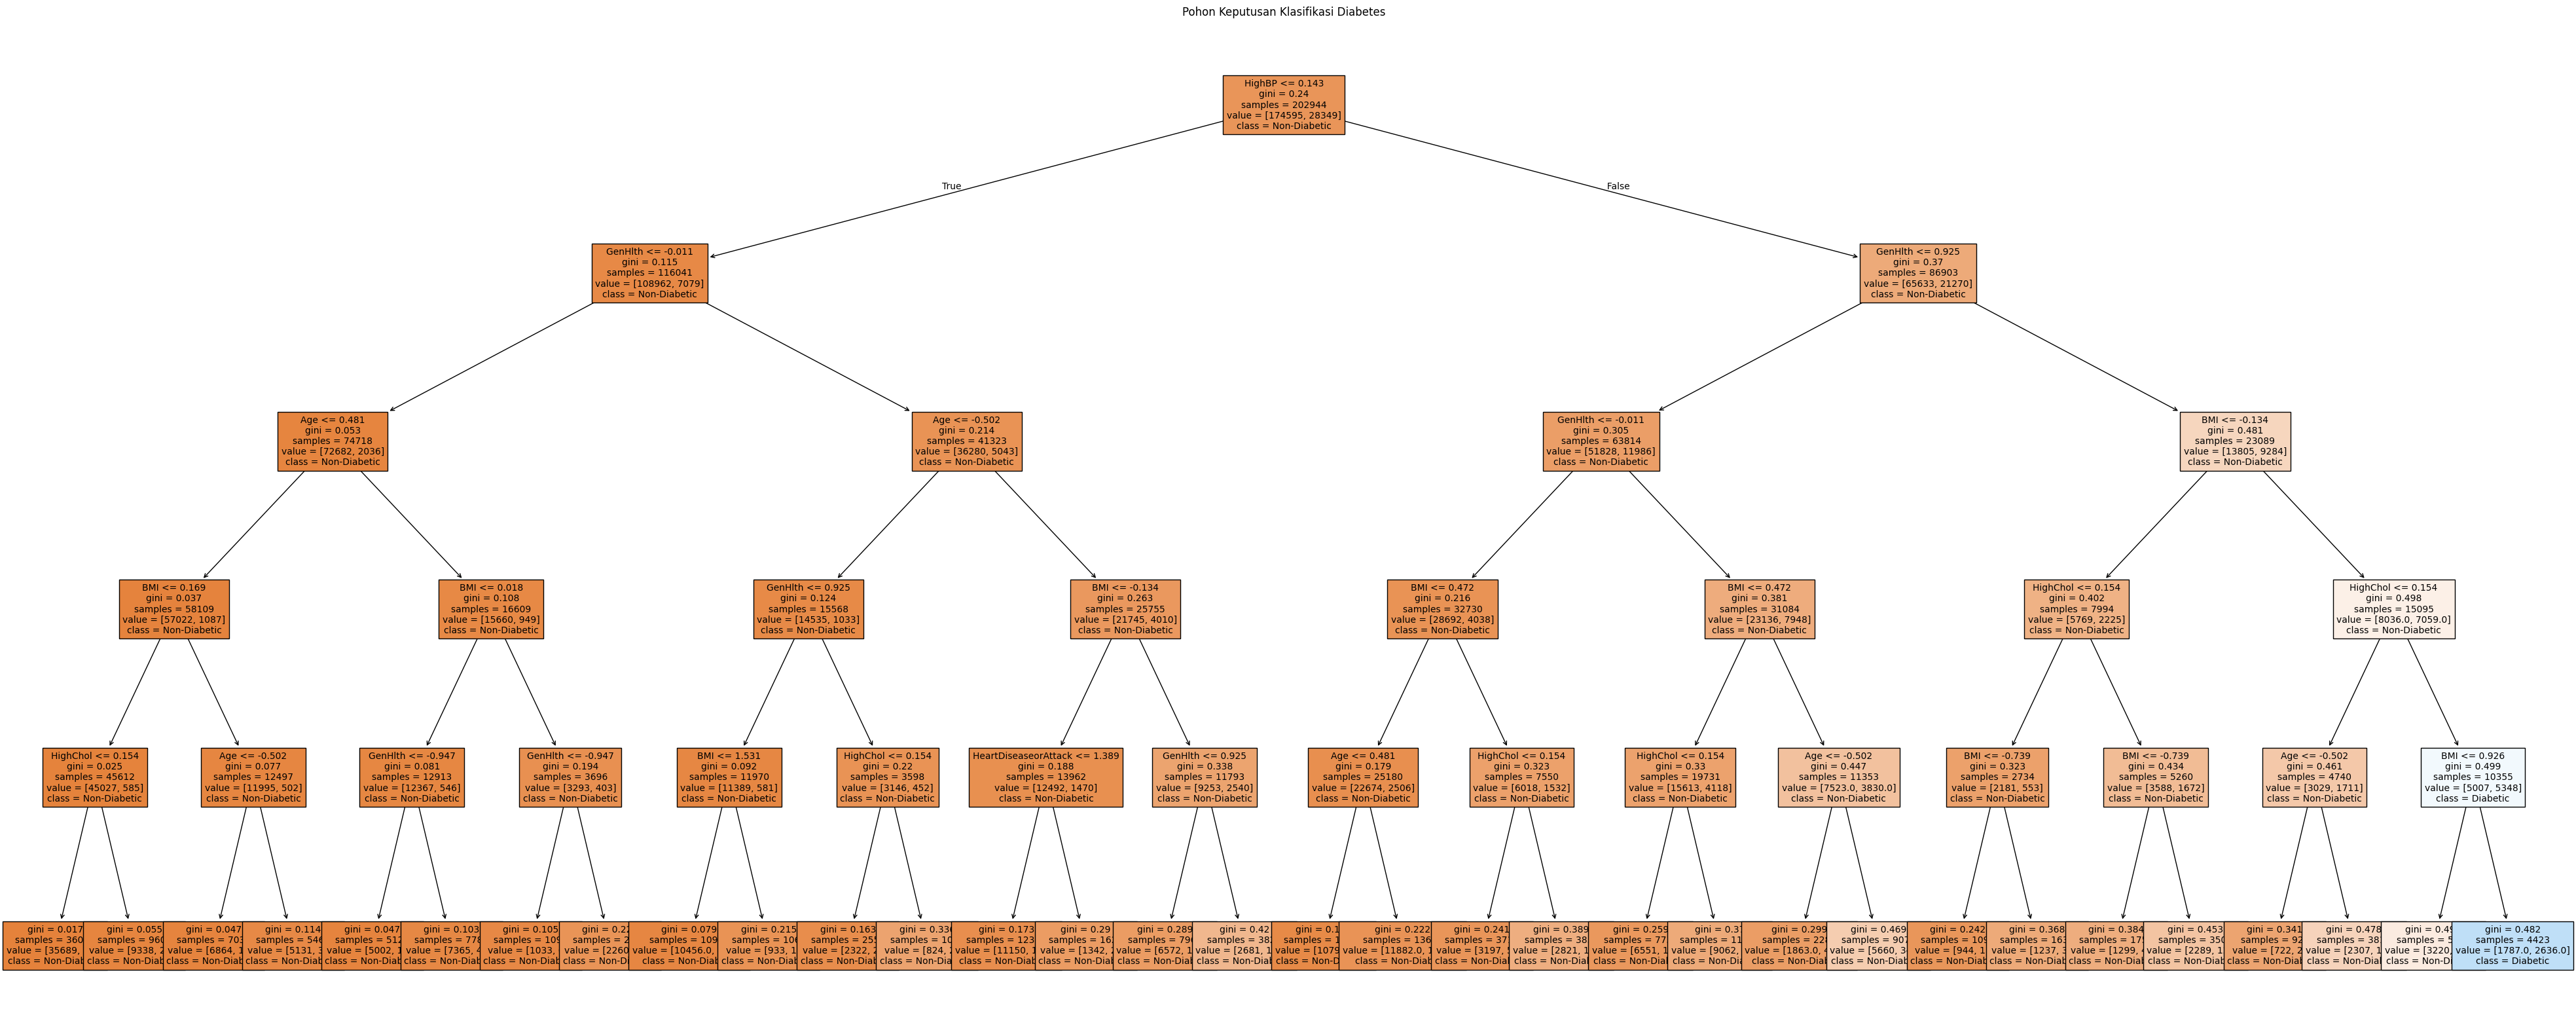

In [17]:
# 7. Training Decision Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 8. Evaluasi Model
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# 9. Visualisasi Struktur Pohon
plt.figure(figsize=(50, 20))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Non-Diabetic', 'Diabetic'],
    filled=True,
    fontsize=10
)
plt.title("Pohon Keputusan Klasifikasi Diabetes")
plt.show()

### Modelling Klasifikasi Dataset CDC Diabetes menggunakan Gaussian Naive Bayes

Pemodelan ini bertujuan untuk memprediksi status diabetes seseorang berdasarkan indikator kesehatan seperti tekanan darah tinggi, kolesterol, BMI, aktivitas fisik, konsumsi alkohol, dan faktor lainnya.

Algoritma klasifikasi yang digunakan adalah Gaussian Naive Bayes, sebuah metode probabilistik yang mengasumsikan bahwa fitur numerik terdistribusi secara normal (Gaussian) dan saling independen satu sama lain.

#### 1. Pembagian Dataset menjadi Data Latih dan Data Uji

Langkah awal adalah membagi data menjadi dua bagian:

* Data Latih (Training Set): untuk melatih model.
* Data Uji (Test Set): untuk mengevaluasi kinerja model pada data baru yang belum pernah dilihat.

Dalam eksperimen ini digunakan rasio:

* 80% data latih
* 20% data uji

Rasio ini umum dipakai karena memberikan cukup data untuk pelatihan sambil tetap menyisakan bagian representatif untuk pengujian.

#### 2. Menghitung Probabilitas Awal (Prior Probability)

Setelah pembagian, kita menghitung prior probability dari masing-masing kelas:

* Kelas `0` = Non-Diabetic
* Kelas `1` = Diabetic

Contoh:

```python
prior = y_train.value_counts(normalize=True)
print("Prior Probability:\n", prior)
```

Nilai ini mencerminkan seberapa umum masing-masing kelas dalam populasi data latih, tanpa mempertimbangkan fitur.

#### 3. Menghitung Rata-rata dan Standar Deviasi Tiap Fitur

Gaussian Naive Bayes bekerja dengan menghitung:

* Rata-rata (mean) dari setiap fitur numerik per kelas (`0` dan `1`)
* Standar deviasi (std) dari setiap fitur numerik per kelas

Langkah ini digunakan untuk membangun fungsi distribusi Gaussian untuk menghitung probabilitas kemunculan nilai fitur tertentu.

Contoh:

```python
X_train_df = pd.DataFrame(X_train, columns=X.columns)
means = X_train_df.groupby(y_train).mean()
stds = X_train_df.groupby(y_train).std()
```

#### 4. Menghitung Distribusi Gaussian

Untuk setiap fitur dan setiap kelas, kita gunakan rumus Gaussian:

$$
P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

Ini digunakan oleh model GaussianNB secara internal untuk menghitung likelihood dari setiap fitur.


#### 5. Menghitung Posterior Probability

Posterior dihitung sebagai hasil perkalian antara semua **likelihood fitur** dan **prior probability** untuk masing-masing kelas:

$$
\text{Posterior} = P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)
$$

Kelas dengan nilai posterior terbesar akan dipilih sebagai hasil klasifikasi.



#### 6. Menentukan Prediksi Kelas

Model Gaussian Naive Bayes akan memilih kelas (`0` atau `1`) dengan nilai posterior tertinggi sebagai prediksi akhir dari suatu observasi baru.


Berikut kode implementasi klasifikasinya:

```python
from sklearn.naive_bayes import GaussianNB

# 1. Inisialisasi model
gnb = GaussianNB()

# 2. Latih model
gnb.fit(X_train, y_train)

# 3. Prediksi
y_pred = gnb.predict(X_test)

# 4. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"]))
```

### Kesimpulan

Model Gaussian Naive Bayes merupakan algoritma yang ringan, cepat, dan cukup akurat untuk data dengan fitur numerik yang bersifat relatif independen.

Pada dataset CDC Diabetes, model ini memberikan pendekatan probabilistik yang mampu memprediksi status diabetes berdasarkan kombinasi indikator kesehatan secara statistik.


Akurasi: 0.771996215704825

=== Classification Report ===
              precision    recall  f1-score   support

Non-Diabetic       0.92      0.81      0.86     43739
    Diabetic       0.32      0.57      0.41      6997

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.63     50736
weighted avg       0.84      0.77      0.80     50736



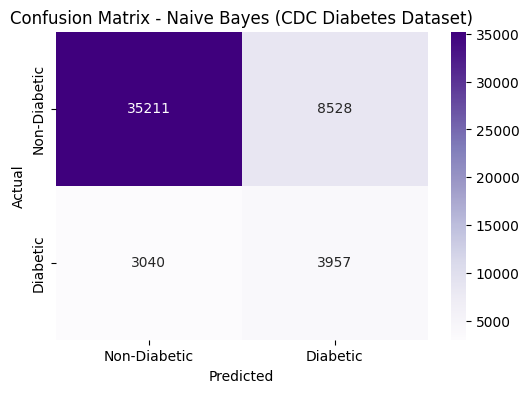

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv('/content/dataset_diabetes.csv')  # Ganti path sesuai lokasi file kamu

# 2. Pisahkan fitur dan target
X = df.drop(columns=['Diabetes_binary'])  # Fitur
y = df['Diabetes_binary']                 # Target (0 = Non-Diabetic, 1 = Diabetic)

# 3. Label Encoding jika ada fitur kategorikal
categorical_cols = X.select_dtypes(include='object').columns
if len(categorical_cols) > 0:
    X[categorical_cols] = X[categorical_cols].apply(LabelEncoder().fit_transform)

# 4. Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Latih model Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 7. Evaluasi hasil prediksi
y_pred = gnb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'], cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (CDC Diabetes Dataset)")
plt.show()

## Modelling Klasifikasi Dataset CDC Diabetes Health Indicators menggunakan K-Nearest Neighbor (K-NN)

Dalam pemodelan ini, digunakan algoritma **K-Nearest Neighbors (KNN)** untuk mengklasifikasikan individu ke dalam dua kategori berdasarkan kolom `Diabetes_binary`, yaitu:

* 0 = Tidak Diabetes
* 1 = Mengidap Diabetes

Prediksi ini didasarkan pada berbagai indikator kesehatan seperti IMT (BMI), tekanan darah tinggi, konsumsi buah dan sayur, kebiasaan merokok, status kesehatan mental/fisik, dan faktor gaya hidup lainnya.


### 1. Pembagian Dataset: Training dan Testing

Dataset CDC Diabetes dibagi menjadi:

* Training Set (80%): Digunakan untuk menyimpan dan "menghafal" data pasien.
* Testing Set (20%): Digunakan untuk menguji performa model terhadap data baru yang belum dilihat sebelumnya.

Pembagian ini dilakukan menggunakan fungsi `train_test_split`.

### 2. Pra-Pemrosesan Data

Sebelum menerapkan KNN, dilakukan tahap-tahap berikut:

* Label Encoding (jika ada): Dataset ini sebagian besar sudah numerik, namun jika terdapat fitur kategorikal (object/string), maka akan diubah ke angka menggunakan `LabelEncoder`.

* Scaling/Normalisasi: Sangat penting untuk KNN. Menggunakan `StandardScaler` agar setiap fitur memiliki distribusi standar (mean = 0, std = 1). Hal ini mencegah dominasi fitur yang memiliki rentang nilai lebih besar.


### 3. Konsep Kerja KNN

Model ini tidak membentuk rumus, melainkan menyimpan seluruh data training.

Proses prediksi:

1. Mengukur jarak Euclidean antara data uji dan semua data latih.
2. Memilih k tetangga terdekat.
3. Mayoritas label dari tetangga ini menjadi prediksi akhir.

Contoh: Jika `k = 5` dan 3 dari 5 tetangga memiliki label "1", maka data baru diklasifikasikan sebagai "Diabetes".


### 4. Evaluasi Model

Evaluasi dilakukan menggunakan:

* Akurasi: Jumlah prediksi benar dibagi total prediksi.
* Classification Report: Precision, recall, F1-score untuk kelas diabetes dan non-diabetes.
* Confusion Matrix: Distribusi prediksi benar dan salah.

Eksperimen dilakukan dengan beberapa nilai `k` (misal: 3, 5, 7) untuk melihat mana yang memberikan performa terbaik.

Akurasi: 0.8467951750236519

=== Classification Report ===
              precision    recall  f1-score   support

Non-Diabetic       0.88      0.95      0.91     43739
    Diabetic       0.40      0.21      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.64      0.58      0.59     50736
weighted avg       0.82      0.85      0.83     50736



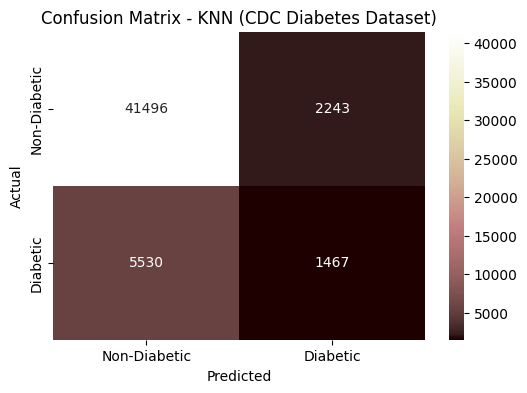

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Dataset CDC
df = pd.read_csv('/content/dataset_diabetes.csv')  # Ganti path jika perlu

# 2. Pisahkan fitur dan target
X = df.drop(columns=['Diabetes_binary'])  # Target kolom = Diabetes_binary
y = df['Diabetes_binary']

# 3. Label Encoding untuk fitur kategorikal jika ada
categorical_cols = X.select_dtypes(include='object').columns
if len(categorical_cols) > 0:
    encoder = LabelEncoder()
    for col in categorical_cols:
        X[col] = encoder.fit_transform(X[col])

# 4. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split data (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 6. Latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Ubah k sesuai kebutuhan
knn.fit(X_train, y_train)

# 7. Evaluasi model
y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (CDC Diabetes Dataset)")
plt.show()

## Evaluasi Data

Berdasarkan hasil klasifikasi pada *dataset CDC Diabetes Health Indicators*, diperoleh tingkat akurasi dari ketiga model sebagai berikut:

* Decision Tree : 86,15%
* Gaussian Naive Bayes : 74,22%
* K-Nearest Neighbor (KNN) : 84,90%

Dari hasil tersebut, dapat diketahui bahwa:

* Decision Tree Classifier menunjukkan performa tertinggi dengan akurasi sebesar 86,15%, sedikit lebih unggul dibandingkan algoritma lainnya.
* KNN berada di urutan kedua dengan akurasi yang juga tinggi, yaitu 84,90%, namun memerlukan proses normalisasi dan lebih sensitif terhadap pemilihan nilai k.
* Gaussian Naive Bayes, meskipun merupakan model yang sederhana dan cepat, memberikan akurasi lebih rendah, yaitu 74,22%, kemungkinan disebabkan oleh asumsi distribusi normal yang tidak sepenuhnya terpenuhi dalam data ini.

### Kesimpulan

Model Decision Tree menjadi pilihan terbaik dalam klasifikasi status diabetes pada dataset CDC karena:

* Mampu menangani data numerik dan kategorikal.
* Tidak membutuhkan scaling.
* Memiliki struktur yang dapat dijelaskan secara visual dan logis.

Namun demikian, KNN dan Naive Bayes tetap layak dipertimbangkan sebagai model baseline atau pendukung, tergantung konteks penggunaan dan kebutuhan komputasi.


## Deployment

Setelah evaluasi model dilakukan, model Decision Tree dipilih sebagai model terbaik berdasarkan akurasi tertinggi.

In [ ]:
import joblib

# Simpan model Decision Tree ke file
joblib.dump(clf, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load dataset
df = pd.read_csv("dataset_diabetes.csv")  # Pastikan file ini ada di folder yang sama

# Pilih 5 fitur saja
fitur = ['HighBP', 'HighChol', 'BMI', 'Age', 'Smoker']
X = df[fitur]
y = df['Diabetes_binary']  # 0 = Tidak, 1 = Ya

# Bagi data untuk pelatihan (opsional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Simpan model ke file
joblib.dump(clf, "decision_tree_model.pkl")
print("Model berhasil disimpan sebagai decision_tree_model.pkl")

Model berhasil disimpan sebagai decision_tree_model.pkl


In [26]:
import joblib
import numpy as np
import gradio as gr

# Load model
model = joblib.load("decision_tree_model.pkl")

# Fungsi prediksi
def prediksi_diabetes(highbp, highchol, bmi, age, smoker):
    try:
        # Buat array input
        data = np.array([[highbp, highchol, bmi, age, smoker]])

        # Prediksi
        prediksi = model.predict(data)[0]
        hasil = "Positif Diabetes" if prediksi == 1 else "Negatif Diabetes"
        return f"Hasil Prediksi: {hasil}"
    except Exception as e:
        return f"Terjadi Error: {str(e)}"

# Gradio UI
interface = gr.Interface(
    fn=prediksi_diabetes,
    inputs=[
        gr.Radio([0, 1], label="Tekanan Darah Tinggi (HighBP)"),
        gr.Radio([0, 1], label="Kolesterol Tinggi (HighChol)"),
        gr.Number(label="BMI (Body Mass Index)"),
        gr.Number(label="Usia"),
        gr.Radio([0, 1], label="Perokok (Smoker)")
    ],
    outputs="text",
    title="Prediksi Status Diabetes",
    description="Masukkan data untuk memprediksi apakah seseorang berisiko diabetes berdasarkan indikator CDC."
)

# Jalankan aplikasi
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://911dbc4b4a120b1e9b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
